In [0]:
import numpy as np
import scipy.signal as signal

def rhs(x, y):
    # Element-wise multiplication
    return np.multiply(x, (x - y)**3)

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

import numpy as np
import scipy.signal as signal

def problemOneSolver(rightHandSide, *args, **kwargs):

# problemOneSolver solves the poisson equation on the defined domain
# leveraging the poisson equation on the given domain with step
# size of 1. Argument rightHandSide is a function pointer to a matlab
# function
    
    # DE Operator Matrix
    D = np.dot(4, np.eye(7))

    D[0,1] = -1
    D[0,4] = -1
    D[1,2] = -1
    D[1,5] = -1
    D[2,3] = -1
    D[4,5] = -1
    D[4,6] = -1
    D[1,0] = -1
    D[2,1] = -1
    D[3,2] = -1
    D[5,4] = -1
    D[6,4] = -1
    # X and Y Coordinates for evaluating right hand side
    X = np.concatenate([[1],[2],[3],[4],[1],[2],[1]], axis = 0)
    Y = np.concatenate([[1],[1],[1],[1],[2],[2],[3]], axis = 0)
    # Actually evaluate the rhs at points
    rhsVector = rightHandSide(X, Y)

    # Solve for solution vector
    solutionVector = np.linalg.solve(D,rhsVector)

    # define the mesh grid for embedding solution and for visualization
    X, Y = np.meshgrid(np.arange(0,float(6)), np.arange(0,float(5)))
    

    Z = np.vstack([[0,0,0,0,0,0],
        [0, solutionVector[0],
        solutionVector[1],
        solutionVector[2],
        solutionVector[3], 0],
        [0,solutionVector[4],
         solutionVector[5],0,0,0],
        [0,solutionVector[6],0,0,0,0],
        [0,0,0,0,0,0]])

    # Remove x and y coordinates that are not within the domain or boundary
    arr_temp = np.vstack([[1,1,1],[1,0,1],[1,1,1]])
    convolve2d_temp = np.logical_not(signal.convolve2d(Z, arr_temp, mode='same'))
    zeroIndices = np.where(convolve2d_temp)
   
    X[zeroIndices] = np.nan
    Y[zeroIndices] = np.nan   

    return X, Y, Z

X, Y, Z = problemOneSolver(rhs)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


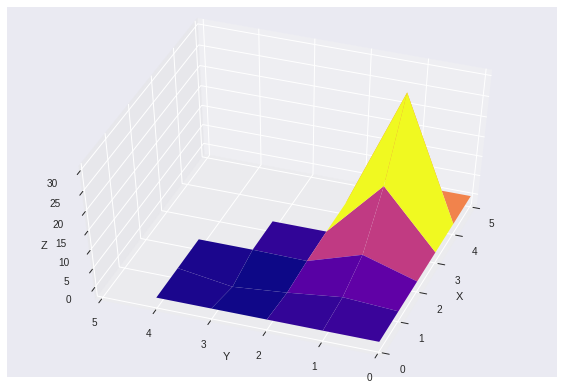

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='plasma', edgecolor='none')


ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
#----- Static image
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
ax.view_init(azim=200, elev=50)
plt.show()

In [0]:
from IPython.core.display import display, HTML
import json
import numpy as np

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera
        
    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))


In [0]:
plot3D(X, Y, Z)